# Practice Problems
### Lecture 22
Answer each number in a separate cell

Rename the notebook with your lastName, first initial and the lecture 
    
    ex. Cych_B_22
    
Turn this notebook into Canvas

## 1. Cartesian coordinates and polar coordinates
- Write lambda functions to replace dir2cart() and cart2dir(). Call them **dir_cart** and **cart_dir**
- You measured a bedding plane with an azimuth of  40 and a plunge of 62. Use your function **dir_cart()** to convert the coordinates to cartesian coordinates.
- Use your function **cart_dir()** to convert the cartesian coordinates back to polar coordinates
- test your functions by calling the **dir2cart()** and **cart2dir()** funtions in the lecture.
- modify **cart2dir()** to round to the nearest decimal

## 2. Unit vectors
- What is the sum of the two vectors Az1=245, Pl1=22 and Az2=10, Pl2=60?
- What is the difference between these vectors?  
- What is angle between the two vectors? 
- What is pole to the two vectors?  
- Make an equal angle diagram
    - plot the two vectors as green triangles
    - plot the pole to the plane as a blue star
    
## 3.  Vectors with length
- Modify the function **dir2cart()** from the lecture to include vector length $R$.  Call it **vec2cart()**.
- Apply your new function to evaluate the cartesian coordinates of the vector with Azimuth=12, Plunge=42, R=8
- Modify the function **cart2dir()** to return the full vector (Azimuth, Plunge and $R$) from the cartesian coordinates.  Call this one **cart2vec()**.  
- Verify that your function works, by feeding the output of **dir2cart()** back into **cart2dir()** to make sure you get back what you started with.    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Cartesian coordinates and polar coordinates


In [2]:
#from the lecture:
def dir2cart(Dir):
    """
    converts polar directions to cartesian coordinates
    Inputs: 
        Dir[Azimuth,Plunge]:  directions in degreess
    Output:
        [X,Y,Z]: cartesian coordinates
    """
    Az,Pl=np.radians(Dir[0]),np.radians(Dir[1])
    return [np.cos(Az)*np.cos(Pl),np.sin(Az)*np.cos(Pl),np.sin(Pl)]
 
def cart2dir(X):
    """
    converts cartesian coordinates to polar azimuth and plunge
    Inputs:
        X: list of X,Y,Z coordinates
    Ouputs: 
        [Az,Pl]: list of polar coordinates in degrees
    """
    R=np.sqrt(X[0]**2+X[1]**2+X[2]**2) # calculate resultant vector length
    Az=np.degrees(np.arctan2(X[1],X[0]))%360. # calculate declination taking care of correct quadrants (arctan2) and making modulo 360.
    Pl=np.degrees(np.arcsin(X[2]/R)) # calculate inclination (converting to degrees) #
    return [Az,Pl]


In [3]:
dir_cart = lambda Az,Pl : [np.cos(np.radians(Az))*np.cos(np.radians(Pl)),\
                           np.sin(np.radians(Az))*np.cos(np.radians(Pl)),np.sin(np.radians(Pl))]
cart_dir = lambda x,y,z : [np.degrees(np.arctan2(y,x))%360,np.degrees(np.arcsin(z/np.sqrt(x**2+y**2+z**2)))]


In [4]:
cart=dir_cart(40,62)
azpl=cart_dir(cart[0],cart[1],cart[2])
print (cart,azpl)


[0.3596360818745141, 0.3017705036589468, 0.8829475928589269] [39.99999999999999, 62.0]


In [5]:
cart=dir2cart([40,62])
azpl=cart2dir(cart)
print (cart,azpl)

[0.3596360818745141, 0.3017705036589468, 0.8829475928589269] [39.99999999999999, 62.0]


In [6]:
# new version:
def cart2dir(X):
    """
    converts cartesian coordinates to polar azimuth and plunge
    Inputs:
        X: list of X,Y,Z coordinates
    Ouputs: 
        [Az,Pl]: list of polar coordinates in degrees
    """
    R=np.sqrt(X[0]**2+X[1]**2+X[2]**2) # calculate resultant vector length
    Az=np.degrees(np.arctan2(X[1],X[0]))%360. # calculate declination taking care of correct quadrants (arctan2) and making modulo 360.
    Pl=np.degrees(np.arcsin(X[2]/R)) # calculate inclination (converting to degrees) #
    return [np.round(Az,1),np.round(Pl,1)]


In [7]:
cart2dir(cart)

[40.0, 62.0]

## 2. Unit vectors

In [8]:
Az1=245; Pl1=22;Az2=10; Pl2=60
cart1=dir2cart([Az1,Pl1])
cart2=dir2cart([Az2,Pl2])
cart3=[]
for i in range(3):
    cart3.append(cart1[i]+cart2[i])
dir3=cart2dir(cart3)
dir3

[277.6, 58.5]

In [9]:
cart4=[]
for i in range(3):
    cart4.append(cart1[i]-cart2[i])
dir4=cart2dir(cart4)
dir4

[226.4, -21.0]

In [10]:
np.degrees(np.arccos(np.dot(cart1,cart2)))

86.6455118917524

In [11]:
pole=cart2dir(np.cross(cart1,cart2))
pole

[145.4, 22.4]

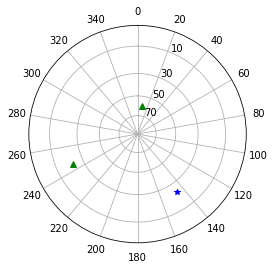

In [12]:
# Here's the equal angle function
EqualAngle = lambda Pl: 90.*np.tan(np.radians(90.-Pl)/(2.))
# make a plot instance with polar axes
fig = plt.subplot(111, polar=True) 
# set the coordinates (like for rose diagrams)
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
# for this we want the full 90 degrees, so set the scale
plt.polar([0],[90]) ## to scale grid
# plot the  directions as a red dots
Azs=np.array([Az1,Az2])
Pls=np.array([Pl1,Pl2])
poles=np.array(pole)
plt.polar(np.radians(Azs),(EqualAngle(Pls)),'g^')
plt.polar(np.radians(poles[0]),(EqualAngle(poles[1])),'b*')

# make a list of contours to plot
# notice use of list comprehension
# label the azimuths at 20 degree intervals
AzContours=range(0,360,20)
AzLabels=[str(p) for p in AzContours]
plt.thetagrids(AzContours,AzLabels)

# and now the plunges
PlContours=[EqualAngle(a) for a in range(10,90,20)] ##don't include center or edge
# make a list of labels
PlLabels=[str(a) for a in range(10,90,20)]
# draw on the plunge contours and label them
plt.rgrids(PlContours,PlLabels);

## 3.  Vectors with length

In [13]:
def vec2cart(Dir):
    """
    converts polar directions to cartesian coordinates
    Inputs: 
        Dir[Azimuth,Plunge,Length]:  directions in degrees and length in arbitrary units
    Output:
        [X,Y,Z]: cartesian coordinates
    """
    Az,Pl,R=np.radians(Dir[0]),np.radians(Dir[1]),Dir[2]
    return [R*np.cos(Az)*np.cos(Pl),R*np.sin(Az)*np.cos(Pl),R*np.sin(Pl)]
 
def cart2vec(X):
    """
    converts cartesian coordinates to polar azimuth and plunge
    Inputs:
        X: list of X,Y,Z coordinates
    Ouputs: 
        [Az,Pl]: list of polar coordinates in degrees
    """
    R=np.sqrt(X[0]**2+X[1]**2+X[2]**2) # calculate resultant vector length
    Az=np.degrees(np.arctan2(X[1],X[0]))%360. # calculate declination taking care of correct quadrants (arctan2) and making modulo 360.
    Pl=np.degrees(np.arcsin(X[2]/R)) # calculate inclination (converting to degrees) #
    return [Az,Pl,R]


In [14]:
Az,Pl,R=12,42,8
cart=vec2cart([Az,Pl,R])
print (cart)
print (cart2vec(cart))

[5.815242624307648, 1.2360679774997898, 5.353044850870866]
[12.0, 42.0, 8.0]
